# **Introduction**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('digits01.npy', allow_pickle = True).item()

In [ ]:
Y_test = list(data.values())[0]
X_test = list(data.values())[1]
X_train = list(data.values())[2]
Y_train = list(data.values())[3]

# **Part a and b)**

For part a) and b), please refer to the pdf.

# **Part c)**

We implemented the coordinate ascent as was demonstrated in the PDF.

In [ ]:
def CoordinateDescentSVM(Xtrain, Ytrain, C, Xtest, Ytest):
    ''' compute the solution of linear SVM
    Xtrain, Ytrain: training set
    Xtest, Ytest: test set (only to monitor test error)
    C: error parameter

    w: weights linear SVM
    TrainError, TestError: training and test errors over iterations
    '''
    n = Xtrain.shape[0]
    alpha = np.zeros([n, 1]) # initialize dual variables
    w = Xtrain.T @ (Ytrain * alpha) # initialize primal variables

    counter = 0
    converged = False
    eps = 1e-3
    TrainError, TestError = [], []
    
    while not converged:
        # select coordinate to update
        r = counter % n

        # solve the subproblem for coordinate r without any constraints
        alpha_unres = alpha[r] - (Ytrain[r]*(w.T@Xtrain[r] - Ytrain[r])/(Xtrain[r] @ Xtrain[r].T))
       
        # project the solution to the interval [0, C / n]
        alpha_res_new = max(0, min(alpha_unres, C/n))

        # set new alpha_r and compute new w
        alpha[r] = alpha_res_new
        w = Xtrain.T @ (Ytrain * alpha)

        # monitor the progress of the method computing the dual
        # objective DualObj
        DualObj = alpha.sum() - 1/2 * (w.T@w).sum()

        if (counter + 1) % 100 == 0:
          print('iteration={} dual obj={:.3f}'.format(counter + 1, DualObj))

        # compute the training and test error with the current iterate alpha
        
        # determine correct predictions
        train_pred_mat = 1 - (Ytrain * np.sign(Xtrain @ w))
        test_pred_mat = 1 - (Ytest * np.sign(Xtest @ w))
        
        # compute training error by 1 - relative frequency of correct predictions
        TrainError.append(1 - np.count_nonzero(train_pred_mat == 0) / Xtrain.shape[0])
        TestError.append(1 - np.count_nonzero(test_pred_mat == 0) / Xtest.shape[0])


        # if the KKT conditions are satisfied up to the tolerance eps by the
        # the current iterate alpha then set converged = True

        # con1: alpha_i = 0
        con1 = (Y_train[(alpha == 0).flatten()].T * (X_train[(alpha == 0).flatten()]@w) >= 1-eps).all()

        # con2: alpha_i = C/n
        con2 = (Y_train[(alpha == C/n).flatten()].T * (X_train[(alpha == C/n).flatten()]@w) <= 1+eps).all()
        
        # con3: 0 < alpha_i < C/n
        con3 = (Y_train[(np.logical_and(alpha > 0, alpha < C/n)).flatten()].T * (X_train[(np.logical_and(alpha > 0, alpha < C/n)).flatten()]@w) >= 1-eps).all() and (Y_train[(np.logical_and(alpha > 0, alpha < C/n)).flatten()].T * (X_train[(np.logical_and(alpha > 0, alpha < C/n)).flatten()]@w) <= 1+eps).all()

        if con1 and con2 and con3:
          converged = True
        
        counter += 1
        
    # compute the primal solution w from alpha
    w = Xtrain.T @ (Ytrain * alpha)

    # show final dual objective
    print('final iteration={} dual obj={:.3f}'.format(counter, DualObj))
    '{:15}'.format('{}'.format([1,2,3]))

    return alpha, w, TrainError, TestError

# **Part d)**

When applying the function defined above, it is noticeable that for C = 10 and 100, the loop stops after 2000 iterations. Also, there are 2000 data points in the training data. This means that once each element in the alpha-vector has been updated, the stopping criterion is met, i.e. the KKT-condtions are fulfilled up to a certainty level of epsilon. 

For C = 200 and C = 500, the loop seems to be running endlessly. Perhaps this is due to the fact that the increased C restricts the alpha values less and thus the KKT-conditions are not met with the demanded accuracy. 


For C = 10:
iteration=100 dual obj=0.499
iteration=200 dual obj=0.998
iteration=300 dual obj=1.495
iteration=400 dual obj=1.991
iteration=500 dual obj=2.486
iteration=600 dual obj=2.979
iteration=700 dual obj=3.472
iteration=800 dual obj=3.963
iteration=900 dual obj=4.453
iteration=1000 dual obj=4.942
iteration=1100 dual obj=5.431
iteration=1200 dual obj=5.917
iteration=1300 dual obj=6.403
iteration=1400 dual obj=6.887
iteration=1500 dual obj=7.369
iteration=1600 dual obj=7.853
iteration=1700 dual obj=8.335
iteration=1800 dual obj=8.814
iteration=1900 dual obj=9.290
iteration=2000 dual obj=9.768
final iteration=2000 dual obj=9.768


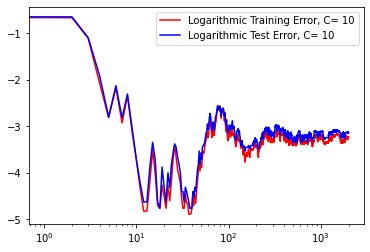


For C = 100:
iteration=100 dual obj=4.940
iteration=200 dual obj=9.772
iteration=300 dual obj=14.481
iteration=400 dual obj=19.056
iteration=500 dual obj=23.553
iteration=600 dual obj=27.913
iteration=700 dual obj=32.172
iteration=800 dual obj=36.299
iteration=900 dual obj=40.305
iteration=1000 dual obj=44.211
iteration=1100 dual obj=48.114
iteration=1200 dual obj=51.705
iteration=1300 dual obj=55.250
iteration=1400 dual obj=58.694
iteration=1500 dual obj=61.911
iteration=1600 dual obj=65.257
iteration=1700 dual obj=68.475
iteration=1800 dual obj=71.366
iteration=1900 dual obj=73.996
iteration=2000 dual obj=76.803
final iteration=2000 dual obj=76.803


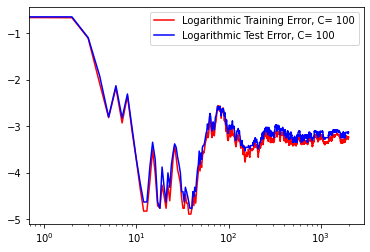


For C = 200:
iteration=100 dual obj=9.761
iteration=200 dual obj=19.087
iteration=300 dual obj=27.926
iteration=400 dual obj=36.225
iteration=500 dual obj=44.214
iteration=600 dual obj=51.653
iteration=700 dual obj=58.688
iteration=800 dual obj=65.196
iteration=900 dual obj=71.221
iteration=1000 dual obj=76.845
iteration=1100 dual obj=82.456
iteration=1200 dual obj=86.821
iteration=1300 dual obj=91.001
iteration=1400 dual obj=94.777
iteration=1500 dual obj=97.685
iteration=1600 dual obj=101.242
iteration=1700 dual obj=104.334
iteration=1800 dual obj=106.578
iteration=1900 dual obj=108.286
iteration=2000 dual obj=110.662
iteration=2100 dual obj=110.809
iteration=2200 dual obj=110.901
iteration=2300 dual obj=110.984
iteration=2400 dual obj=111.001
iteration=2500 dual obj=111.125
iteration=2600 dual obj=111.163
iteration=2700 dual obj=111.199
iteration=2800 dual obj=111.268
iteration=2900 dual obj=111.307
iteration=3000 dual obj=111.333
iteration=3100 dual obj=111.354
iteration=3200 dual

KeyboardInterrupt: ignored

In [ ]:
np.random.seed(42)
C = [10, 100, 200, 500]

for c in C:
  print('\nFor C = {}:'.format(c))

  alpha, w, TrainError, TestError = CoordinateDescentSVM(X_train, Y_train, c, X_test, Y_test)

  TrainError = np.log(TrainError)
  TestError = np.log(TestError)


  str_1 = str("Logarithmic Training Error, C= " + str(c))
  str_2 = str("Logarithmic Test Error, C= " + str(c))

  # plot result
  x = np.arange(len(TrainError))
  plt.plot(x, TrainError, label = str_1, c = 'red')
  plt.plot(x, TestError, label = str_2, c = 'blue')
  plt.legend(loc="upper right")
  plt.xscale('log')
  plt.show()